# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
from __future__ import division
import csv

In [2]:
# Load pickled data
import pickle
import os
import numpy as np

# Where training and testing data is saved.

training_file = os.getcwd()+"/traffic-signs-data/train.p"
validation_file=os.getcwd()+"/traffic-signs-data/valid.p"
testing_file = os.getcwd()+"/traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']
X_train_original = np.copy(X_train)
X_valid_original = np.copy(X_valid)
X_test_original = np.copy(X_test)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
# Number of training examples
n_train = X_train.shape[0]

# Number of testing examples.
n_test = X_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# How many unique classes/labels there are in the dataset.
n_classes = max([len(set(y_train)), len(set(y_valid)), len(set(y_test))])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Total shape of training features = ", X_train.shape)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43
Total shape of training features =  (34799, 32, 32, 3)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


 Count 180  =  Speed limit (20km/h)  for ClassID =  0

 Count 1980  =  Speed limit (30km/h)  for ClassID =  1

 Count 2010  =  Speed limit (50km/h)  for ClassID =  2

 Count 1260  =  Speed limit (60km/h)  for ClassID =  3

 Count 1770  =  Speed limit (70km/h)  for ClassID =  4

 Count 1650  =  Speed limit (80km/h)  for ClassID =  5

 Count 360  =  End of speed limit (80km/h)  for ClassID =  6

 Count 1290  =  Speed limit (100km/h)  for ClassID =  7

 Count 1260  =  Speed limit (120km/h)  for ClassID =  8

 Count 1320  =  No passing  for ClassID =  9

 Count 1800  =  No passing for vehicles over 3.5 metric tons  for ClassID =  10

 Count 1170  =  Right-of-way at the next intersection  for ClassID =  11

 Count 1890  =  Priority road  for ClassID =  12

 Count 1920  =  Yield  for ClassID =  13

 Count 690  =  Stop  for ClassID =  14

 Count 540  =  No vehicles  for ClassID =  15

 Count 360  =  Vehicles over 3.5 metric tons prohibited  for ClassID =  16

 Count 990  =  No entry  for Cla

/Users/KrazyK/Documents/Udacity/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


 for ClassID =  20

 Count 270  =  Double curve  for ClassID =  21

 Count 330  =  Bumpy road  for ClassID =  22

 Count 450  =  Slippery road  for ClassID =  23

 Count 240  =  Road narrows on the right  for ClassID =  24

 Count 1350  =  Road work  for ClassID =  25

 Count 540  =  Traffic signals  for ClassID =  26

 Count 210  =  Pedestrians  for ClassID =  27

 Count 480  =  Children crossing  for ClassID =  28

 Count 240  =  Bicycles crossing  for ClassID =  29

 Count 390  =  Beware of ice/snow  for ClassID =  30

 Count 690  =  Wild animals crossing  for ClassID =  31

 Count 210  =  End of all speed and passing limits  for ClassID =  32

 Count 599  =  Turn right ahead  for ClassID =  33

 Count 360  =  Turn left ahead  for ClassID =  34

 Count 1080  =  Ahead only  for ClassID =  35

 Count 330  =  Go straight or right  for ClassID =  36

 Count 180  =  Go straight or left  for ClassID =  37

 Count 1860  =  Keep right  for ClassID =  38

 Count 270  =  Keep left  for ClassI

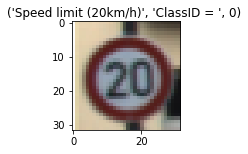

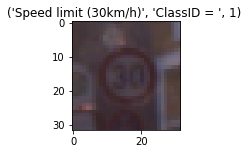

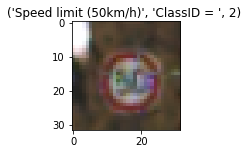

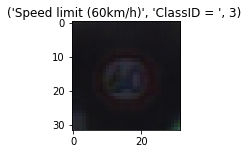

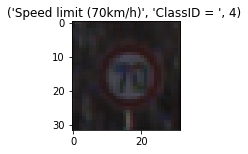

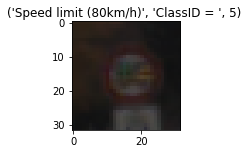

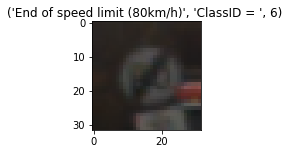

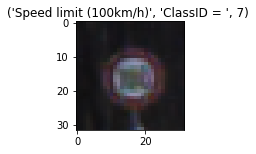

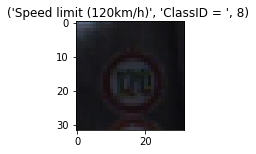

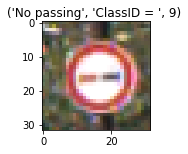

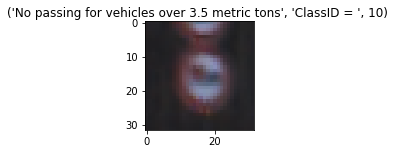

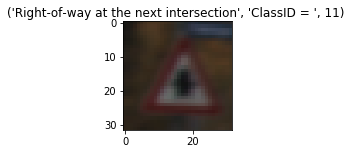

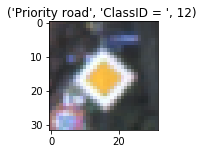

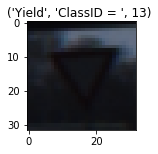

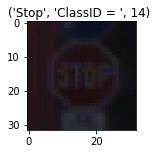

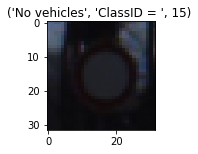

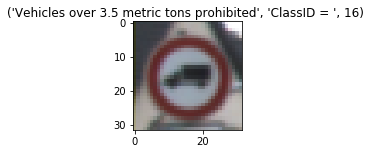

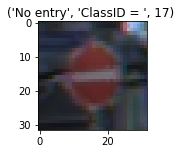

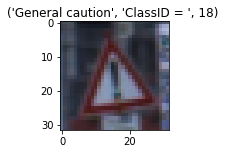

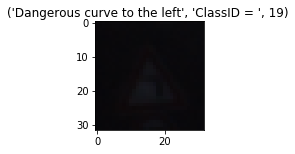

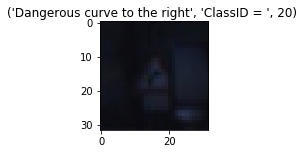

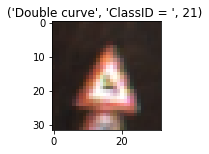

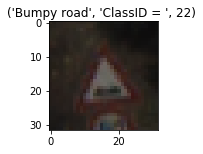

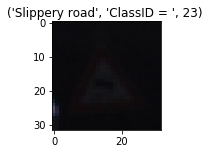

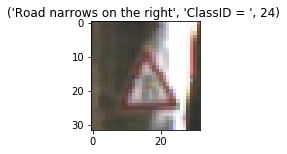

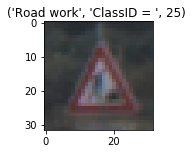

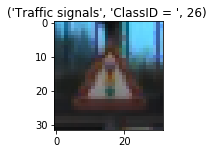

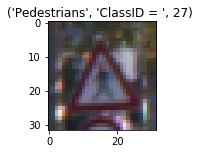

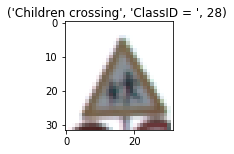

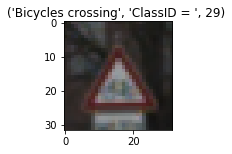

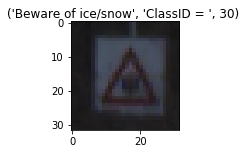

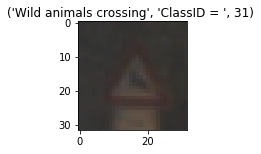

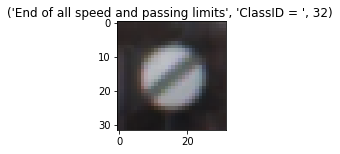

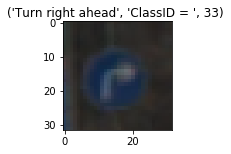

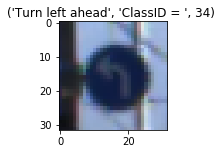

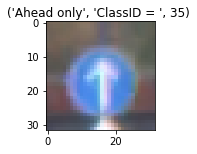

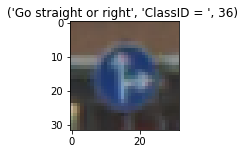

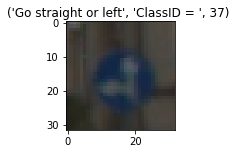

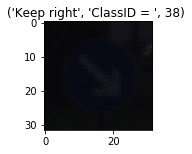

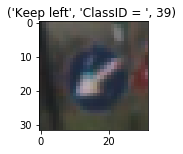

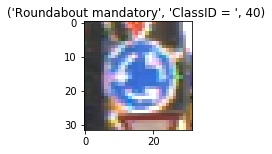

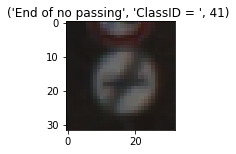

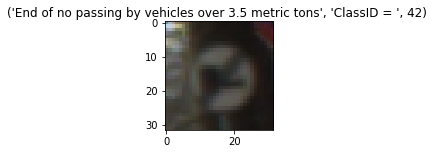

In [5]:
# Explore the number of each sign in data.
sign_counts = {}
unique, counts = np.unique(y_train, return_counts=True)
sign_counts = dict(zip(unique, counts))
    
# Read in the ClassIDs and SignName rosetta from signnames.csv.
with open('signnames.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        signs_rosetta = {}
        for row in reader:
            classid = int(row['ClassId'])
            name = str(row['SignName'])
            signs_rosetta[classid] = name

# Plot the first occurence in the data of an image with ClassID and Sign Name for each ClassID.
indices = np.zeros([43,])
for i in range(43):
    index =  np.where(y_train == i)
    indices[i] = index[0][0]
    
for sign, count in sign_counts.items():

    print('\n Count', count,' = ', signs_rosetta[sign], ' for ClassID = ', sign)
    
    image = X_train[int(indices[sign])].squeeze()
    fig = plt.figure(figsize=(2,2))
    plt.imshow(image, cmap="gray")
    fig.suptitle((signs_rosetta[sign] , 'ClassID = ' , sign))
    

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

Training data: 
Shape of grayed colors =  (34799, 32, 32)
Grayscaled shape =  (34799, 32, 32, 1)
Features have been grayscaled and normalized

Validation data: 
Shape of grayed colors =  (4410, 32, 32)
Grayscaled shape =  (4410, 32, 32, 1)
Features have been grayscaled and normalized

Test data: 
Shape of grayed colors =  (12630, 32, 32)
Grayscaled shape =  (12630, 32, 32, 1)
Features have been grayscaled and normalized



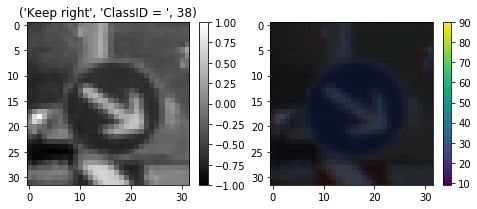

In [6]:
#Grayscale and normalization of color values.
def normalize(features):

    norm = np.zeros((features.shape[0], features.shape[1], 
                         features.shape[2], 1), dtype=np.float32)

    # Check if input has 3 channel color and hasn't been normalized to 1 yet.
    # If so, grayscale and normalize.
    if features.shape[3] > 2 and features.max(axis=0)[0][0][0] > 1.1:
        
        # Slice out red, green, and blue values from all data.
        r = features[:,:,:,0]
        g = features[:,:,:,1]
        b = features[:,:,:,2]

        # Create gray values using the color value. 
        gray = (0.299*r + 0.587*g + 0.114*b)
        print('Shape of grayed colors = ',gray.shape)
        
        # Normalize values in range -1 to 1.
        for i, item in enumerate(gray):
            avg_intensity = np.mean(item)
            min_ = np.min(item)
            max_ = np.max(item)
            delta = (min_ + max_) / 2
            max_adj = max_ - delta
            
            n = delta
            d = max_adj

            item = (item-n)/d
            gray[i] = item
            
        copy = np.copy(features)
        copy = np.resize(copy,(features.shape[0], features.shape[1], 
                             features.shape[2], 1))

        norm[0,1,2] = copy[0,1,2]
        norm[:,:,:,0] = gray

        print('Grayscaled shape = ', norm.shape)
        print('Features have been grayscaled and normalized\n')
        return norm
    
    # Check if input has less than 2 color channels and hasn't been normalized to 1 yet.
    # If so, normalize.
    elif features.shape[3] < 2 and features.max(axis=0)[0][0] > 1.1:
        
        gray = features[:,:,:,0]

        print('Shape of grayed colors = ',gray.shape)
        
        # Normalize values in range -1 to 1.
        for i, item in enumerate(gray):
            avg_intensity = np.mean(item)
            min_ = np.min(item)
            max_ = np.max(item)
            delta = (min_ + max_) / 2
            max_adj = max_ - delta
            
            n = delta
            d = max_adj

            item = (item-n)/d
            gray[i] = item

        norm[:,:,:,0] = gray

        copy = np.copy(features)
        copy = np.resize(copy,(features.shape[0], features.shape[1], 
                             features.shape[2], 1))

        norm[0,1,2] = copy[0,1,2]

        print('Normalized shape = ', norm.shape)
        print('Features already gray! Only normalized\n')
        return norm
    
    #Check if input has one color channel and has been normalized to 1.
    #If so, return unchanged input.
    elif features.shape[3] < 2 and features.max(axis=0)[0][0] < 1.1:
        print('Features are already grayscaled\n')
        return features

#Call normalize function
print('Training data: ')
X_train = normalize(X_train)
print('Validation data: ')
X_valid = normalize(X_valid)
print('Test data: ')
X_test = normalize(X_test)


#Visualize normalization to verify effect on the images.
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(8,3))
plt.subplot(121)
plt.imshow(image, interpolation='none', cmap='gray')
plt.colorbar()
plt.title((signs_rosetta[y_train[index]] , 'ClassID = ' , y_train[index]))

image = X_train_original[index].squeeze()
plt.subplot(122)
plt.imshow(image, interpolation='none')
plt.colorbar()

path = os.getcwd() + '/examples/'
plt.savefig(path + 'Grayscale_Example.png', bbox_inches='tight')

In [7]:
# Random image rotation by 90 increments

# print('Training data shape = ', X_train.shape)

# X_rotated = np.zeros([X_train.shape[0], 32, 32, 1])
# for i, image in enumerate(X_train):
#     k = random.randint(0, 3)
#     rotated = np.rot90(image, k=k, axes=(0, 1))
#     X_rotated[i] = rotated
    
# print('Rotated data shape = ', X_rotated.shape) 

# index = random.randint(0, len(X_train))
# image = X_rotated[index].squeeze()

# plt.figure(figsize=(8,3))
# plt.subplot(121)
# plt.imshow(image, interpolation='none', cmap='gray')
# plt.colorbar()
# plt.title((signs_rosetta[y_train[index]] , 'ClassID = ' , y_train[index]))

# image = X_train_original[index].squeeze()
# plt.subplot(122)
# plt.imshow(image, interpolation='none')
# plt.colorbar()

# plt.savefig(path + 'Rotated_Example.png', bbox_inches='tight')

In [8]:
#Shuffle the training data to improve learning accuracy.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [9]:
import tensorflow as tf
#Set the epochs and batch size for training.
EPOCHS = 60
BATCH_SIZE = 128

### Model Architecture

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and 
    #biases for each layer
    mu = 0
    sigma = 0.05
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # The shape of the filter weight is (height, width, input_depth, output_depth)
    # The shape of the filter bias is (output_depth,)
    strides = [1,1,1,1]
    padding = 'VALID'
    w1 = tf.Variable(tf.truncated_normal([5, 5, 1, 6], mu, sigma))
    b1 = tf.Variable(tf.truncated_normal([6], mu, sigma))
    conv1 = tf.nn.conv2d(x, w1, strides, padding) + b1
    print('1st convolution',conv1)
    
    # Activation. 
    conv1 = tf.nn.relu(conv1, name='act1')
    print('1st convolution activated',conv1)
    
    #Layer 2 Convolutional. Input = 28x28x6. Output = 24x24x12
    w2 = tf.Variable(tf.truncated_normal([5, 5, 1, 12], mu, sigma))
    b2 = tf.Variable(tf.truncated_normal([12], mu, sigma))
    conv2 = tf.nn.conv2d(x, w2, strides, padding) + b2
    print('2nd convolution',conv2)
    
    # Activation. 
    conv2 = tf.nn.relu(conv2, name='act2')
    print('2nd convolution activated',conv2)

    # Pooling. Input = 24x24x12. Output = 12x12x12.
    k = 2
    pool1 = tf.nn.max_pool(conv2, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')
    print('1st pool',pool1)
    
    # Layer 3: Convolutional. Output = 8x8x18.
    w3 = tf.Variable(tf.truncated_normal([5,5,12,18], mu, sigma))
    b3 = tf.Variable(tf.truncated_normal([18], mu, sigma))
    conv3 = tf.nn.conv2d(pool1, w3, strides, padding) + b3
    print('3rd convolution',conv3)
    
    # TODO: Activation.
    conv3 = tf.nn.relu(conv3, name='act3')
    print('3rd convolution activated',conv3)
    
    # Layer 4: Convolutional. Output = 4x4x40.
    w4 = tf.Variable(tf.truncated_normal([5,5,18,40], mu, sigma))
    b4 = tf.Variable(tf.truncated_normal([40], mu, sigma))
    conv4 = tf.nn.conv2d(conv3, w4, strides, padding) + b4
    print('4th convolution',conv4)
    
    # TODO: Activation.
    conv4 = tf.nn.relu(conv4, name='act4')
    print('3rd convolution activated',conv4)

    # TODO: Pooling. Input = 4x4x40. Output = 2x2x40.
    k = 2
    pool2 = tf.nn.max_pool(conv4, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')
    print('2nd pool',pool2)

    # TODO: Flatten. Input = 2x2x40. Output = 160.
    flat = tf.contrib.layers.flatten(pool2)
    print('Flattened',flat)
    
    # TODO: Layer 5: Fully Connected. Input = 160. Output = 120.
    w5 = tf.truncated_normal_initializer(mu,sigma)
    b5 = tf.truncated_normal_initializer(mu,sigma)
    full5 = tf.contrib.layers.fully_connected(flat, 120, activation_fn=tf.nn.relu, 
                                              weights_initializer=w5,
                                             biases_initializer=b5)
    print('Fully connected 5',full5)
    
    #Dropout layer 5
    dropout5 = tf.nn.dropout(full5, keep_prob)

    # Layer 6: Fully Connected. Input = 120. Output = 90.
    w6 = tf.truncated_normal_initializer(mu,sigma)
    b6 = tf.truncated_normal_initializer(mu,sigma)
    full6 = tf.contrib.layers.fully_connected(dropout5, 90, activation_fn=tf.nn.relu,  
                                              weights_initializer=w6,
                                             biases_initializer=b6)
    print('Fully connected 6',full6)
    
    #Dropout layer 4
    dropout6 = tf.nn.dropout(full6, keep_prob)

    # Layer 7: Fully Connected. Input = 90. Output = 43.
    w7 = tf.truncated_normal_initializer(mu,sigma)
    b7 = tf.truncated_normal_initializer(mu,sigma)
    full7 = tf.contrib.layers.fully_connected(dropout6, 43, activation_fn=None, weights_initializer=w7,
                                              biases_initializer=b7)
    print('Fully connected 7',full7)
    
    #Return logits for network
    logits = full7
    return logits
    

In [11]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1), name='x')
y = tf.placeholder(tf.int32, (None), name='y')
keep_prob = tf.placeholder(tf.float32, name='keep_prob') # probability to keep units
one_hot_y = tf.one_hot(y, 43, name='one_hot_y')

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

1st convolution Tensor("add:0", shape=(?, 28, 28, 6), dtype=float32)
1st convolution activated Tensor("act1:0", shape=(?, 28, 28, 6), dtype=float32)
2nd convolution Tensor("add_1:0", shape=(?, 28, 28, 12), dtype=float32)
2nd convolution activated Tensor("act2:0", shape=(?, 28, 28, 12), dtype=float32)
1st pool Tensor("MaxPool:0", shape=(?, 14, 14, 12), dtype=float32)
3rd convolution Tensor("add_2:0", shape=(?, 10, 10, 18), dtype=float32)
3rd convolution activated Tensor("act3:0", shape=(?, 10, 10, 18), dtype=float32)
4th convolution Tensor("add_3:0", shape=(?, 6, 6, 40), dtype=float32)
3rd convolution activated Tensor("act4:0", shape=(?, 6, 6, 40), dtype=float32)
2nd pool Tensor("MaxPool_1:0", shape=(?, 3, 3, 40), dtype=float32)
Flattened Tensor("Flatten/Reshape:0", shape=(?, 360), dtype=float32)
Fully connected 5 Tensor("fully_connected/Relu:0", shape=(?, 120), dtype=float32)
Fully connected 6 Tensor("fully_connected_1/Relu:0", shape=(?, 90), dtype=float32)
Fully connected 7 Tensor("fu

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [ ]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        train_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print('Training Accuracy = {:.3f}'.format(train_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_signs', global_step=0)
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.719
Validation Accuracy = 0.696

EPOCH 2 ...
Training Accuracy = 0.881
Validation Accuracy = 0.851

EPOCH 3 ...
Training Accuracy = 0.937
Validation Accuracy = 0.906

EPOCH 4 ...
Training Accuracy = 0.958
Validation Accuracy = 0.932

EPOCH 5 ...
Training Accuracy = 0.970
Validation Accuracy = 0.934

EPOCH 6 ...
Training Accuracy = 0.982
Validation Accuracy = 0.949

EPOCH 7 ...
Training Accuracy = 0.982
Validation Accuracy = 0.942

EPOCH 8 ...
Training Accuracy = 0.988
Validation Accuracy = 0.963

EPOCH 9 ...
Training Accuracy = 0.990
Validation Accuracy = 0.963

EPOCH 10 ...
Training Accuracy = 0.990
Validation Accuracy = 0.974

EPOCH 11 ...
Training Accuracy = 0.993
Validation Accuracy = 0.969

EPOCH 12 ...
Training Accuracy = 0.993
Validation Accuracy = 0.967

EPOCH 13 ...
Training Accuracy = 0.995
Validation Accuracy = 0.974

EPOCH 14 ...
Training Accuracy = 0.995
Validation Accuracy = 0.971

EPOCH 15 ...
Training Accuracy = 0.994
Valid

## Evaluate the Model on the Test Set

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [ ]:
# Get internet images path
path = os.getcwd() + '/internet-traffic-signs/'
files = os.listdir(path) # list of image file names
try:
    files.remove('.DS_Store') #remove .DS_Store file from list of images
except ValueError:
    pass
print(files)

In [ ]:
#Initialize the internet images test array.
X_internet = np.zeros([5, 32, 32, 3], dtype=np.uint8)

print('Import path = ', path + files[0])

for i, file in enumerate(files):
    
    img = cv2.imread(path + file, cv2.IMREAD_COLOR)
    
    #Swapping red and blue channels for proper output.
    red = img[:,:,2].copy()
    blue = img[:,:,0].copy()
    img[:,:,0] = red
    img[:,:,2] = blue
    
    # Assign imported image into the internet images test array.
    X_internet[i] = img

    print('Image imported = ', file)
    print('Shape is ', X_internet[i].shape)
  
print('X_internet shape = ',X_internet.shape)
X_internet_original = np.copy(X_internet)
print('Original shape = ', X_internet_original.shape)

## Preprocess loaded images and output processed and original

In [ ]:
X_internet = normalize(X_internet)

for index, img in enumerate(X_internet):

    image = img.squeeze()
    
    plt.figure(figsize=(8,3))
    plt.subplot(121)
    plt.imshow(image, interpolation='none', cmap='gray')
    plt.colorbar()
    plt.title('Gray and Normed')

    image = X_internet_original[index].squeeze()
    plt.subplot(122)
    plt.imshow(image, interpolation='none')
    plt.colorbar()
    plt.title('Color')

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

# Read in signnames.csv
# with open('signnames.csv') as csvfile:
#         reader = csv.DictReader(csvfile)
#         signs_rosetta = {}
#         for row in reader:
#             classid = int(row['ClassId'])
#             name = str(row['SignName'])
#             signs_rosetta[classid] = name

# Internet image labels.
y_internet = np.array([12,33,25,1,36])

#Predictions for internet images.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    prediction=tf.argmax(logits,1)
    predictions = prediction.eval(feed_dict={x: X_internet, keep_prob: 1}, session=sess)
    print("Predictions = ", predictions)

for i, pred in enumerate(predictions):
    
    print('\nPrediction = ', signs_rosetta[pred], ' \nActual Sign = ',signs_rosetta[y_internet[i]])


### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

#Function to evaluate the internet data.
def evaluate_internet(X_data, y_data):
    sess = tf.get_default_session()
    
    accuracy = sess.run(accuracy_operation, feed_dict={x: X_data, y: y_data, keep_prob: 1})
    return accuracy

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate_internet(X_internet, y_internet)
    print("Internet Accuracy = {:.3f}".format(test_accuracy))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 

# Calculate top 5 soft max probabilities for internet images
softmax = tf.nn.softmax(logits=logits, name='softmax')
Top5_Softmaxes = tf.nn.top_k(softmax, k=5)
 
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    # Get softmax top 5 for each image
    for i in range(5):
        xint = np.zeros([1,32,32,1])
        xint[0] = X_internet[i]

        Top5 = sess.run(Top5_Softmaxes, feed_dict={x: xint, y: y_internet, keep_prob: 1})
        
        #Create bar graph
        n_groups = 5
        prob = Top5[0].reshape([5]) # Array of probabilities
        classes = Top5[1].reshape([5]) # Array of ClassIDs
        index = np.arange(n_groups)
        bar_width = 0.35
        opacity = 0.4
        error_config = {'ecolor': '0.3'}

        # Plot Traffic sign image
        fig = plt.figure(figsize=(10,5))
        plt.subplot(121)
        image = X_internet_original[i].squeeze()
        plt.imshow(image, interpolation='none')
        plt.title(signs_rosetta[classes[0]]) # Traffic sign name
        
        # Plot the bar graph with softmax probabilities
        ax = plt.subplot(122)
        rects = plt.bar(index, prob, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config)
        
        plt.xlabel('ClassID')
        plt.ylabel('Softmax Probabilities')
        plt.title('Top 5 Softmax Probabilities')
        plt.xticks(index + bar_width / 15, classes)
        plt.legend()
        plt.tight_layout()
        
        # Get y-axis height to calculate label position from
        (y_bottom, y_top) = ax.get_ylim()
        y_height = y_top - y_bottom

        # Label each bar with SignName
        for i, rect in enumerate(rects):
            height = rect.get_height()
            label_position = 0 + (y_height * 0.1)

            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                    signs_rosetta[classes[i]],
                    ha='center', va='bottom', rotation='vertical')
            
        # Save figures to files with sign filenames
        path = os.getcwd()
        figfile = signs_rosetta[classes[0]].replace("/", " per ") 
        plt.savefig(path + '/Softmax_Figs/{}.png'.format(figfile), bbox_inches='tight')

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
 
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
# Very frustrated that I couldn't get this to work. I spent hours on slack, forums, etc. 
# Please explain why this doesn't work.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

#Visualize activation
    act2 = sess.graph.get_tensor_by_name("act2:0")
#     xint = np.zeros([1,32,32,1])
#     xint[0] = X_internet[3]
    xint = np.asarray(X_internet[3:4])
   
    outputFeatureMap(xint, act2, plt_num=6)
    

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 